In [2]:
x=100

In [3]:
x

100

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

titanic = pd.read_csv("titanic_pre.csv")
titanic["Died"] = np.where(titanic["Survived"]==0, 1, 0)
print(titanic.head())
titanic.head().to_html("ch13-5c-01.html")                       

   PassengerId                                           Name  PClass    Age  \
0            1                   Allen, Miss Elisabeth Walton     1.0  29.00   
1            2                    Allison, Miss Helen Loraine     1.0   2.00   
2            3            Allison, Mr Hudson Joshua Creighton     1.0  30.00   
3            4  Allison, Mrs Hudson JC (Bessie Waldo Daniels)     1.0  25.00   
4            5                  Allison, Master Hudson Trevor     1.0   0.92   

      Sex  Survived  SexCode Title  Died  
0  female         1        1  Miss     0  
1  female         0        1  Miss     1  
2    male         0        0    Mr     1  
3  female         0        1   Mrs     1  
4    male         1        0    Mr     0  



## 繪出直方圖的年齡分佈, 生存或死亡


<Axes: ylabel='Frequency'>

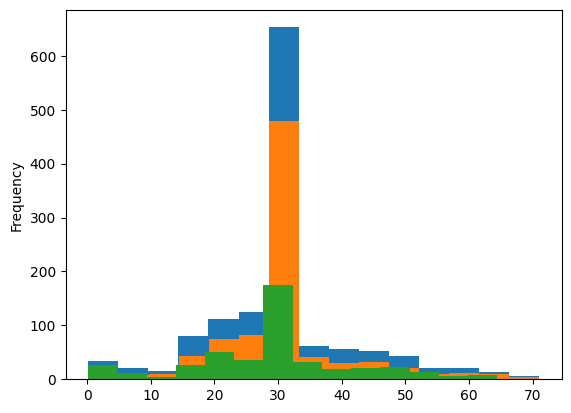

In [2]:
titanic["Age"].plot(kind="hist", bins=15)
df = titanic[titanic.Survived == 0]
df["Age"].plot(kind="hist", bins=15)
df = titanic[titanic.Survived == 1]
df["Age"].plot(kind="hist", bins=15)


## 分類顯示Title欄位的生存和死亡數


<Axes: xlabel='Title'>

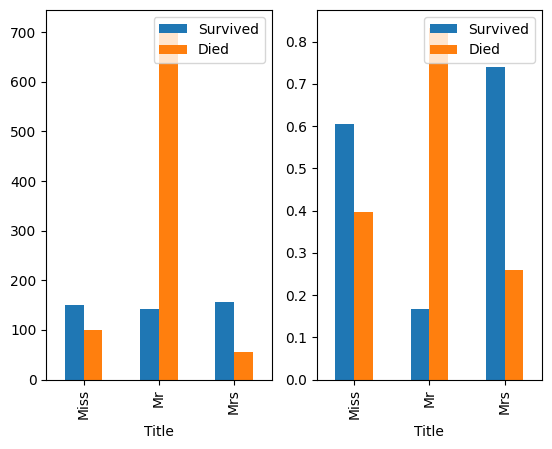

In [3]:
fig, axes = plt.subplots(nrows=1, ncols=2)
df = titanic[["Survived","Died"]].groupby(titanic["Title"]).sum()
df.plot(kind="bar", ax=axes[0])
df = titanic[["Survived","Died"]].groupby(titanic["Title"]).mean()
df.plot(kind="bar", ax=axes[1])


## 分類顯示Sex欄位的生存和死亡數

<Axes: xlabel='Sex'>

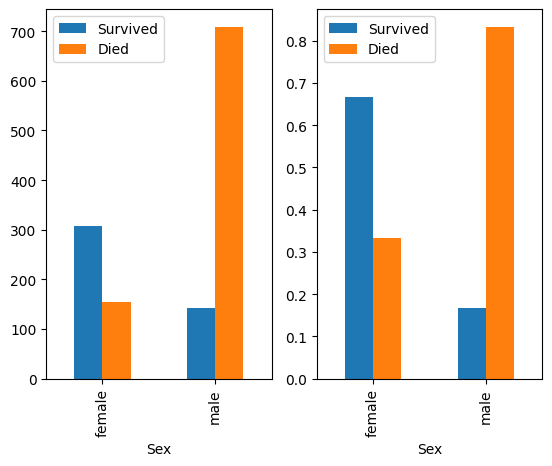

In [4]:
fig, axes = plt.subplots(nrows=1, ncols=2)
df = titanic[["Survived","Died"]].groupby(titanic["Sex"]).sum()
df.plot(kind="bar", ax=axes[0])
df = titanic[["Survived","Died"]].groupby(titanic["Sex"]).mean()
df.plot(kind="bar", ax=axes[1])


## 分類顯示PClass欄位的生存和死亡數


<Axes: xlabel='PClass'>

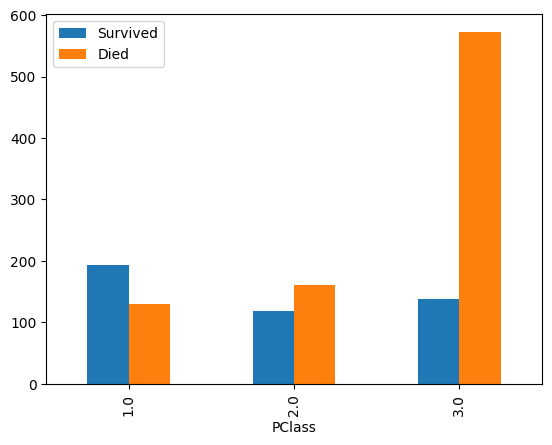

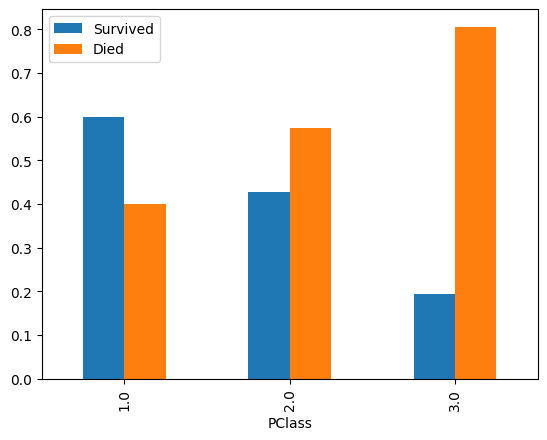

In [5]:
df = titanic[['Survived',"Died"]].groupby(titanic["PClass"]).sum()
df.plot(kind="bar")
df = titanic[['Survived',"Died"]].groupby(titanic["PClass"]).mean()
df.plot(kind="bar")


## 計算相關係數


<Axes: ylabel='Frequency'>

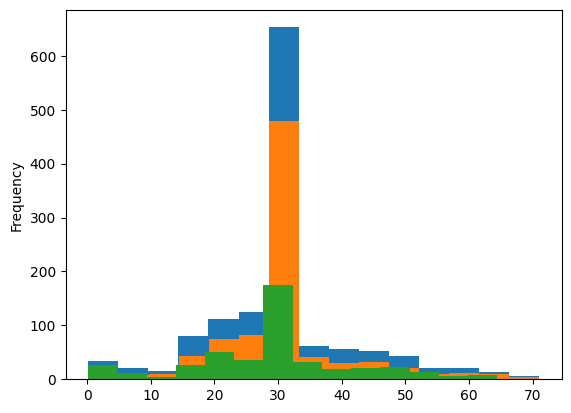

In [6]:

# 繪出直方圖的年齡分佈, 生存或死亡
titanic["Age"].plot(kind="hist", bins=15)
df = titanic[titanic.Survived == 0]
df["Age"].plot(kind="hist", bins=15)
df = titanic[titanic.Survived == 1]
df["Age"].plot(kind="hist", bins=15)


<Axes: xlabel='Title'>

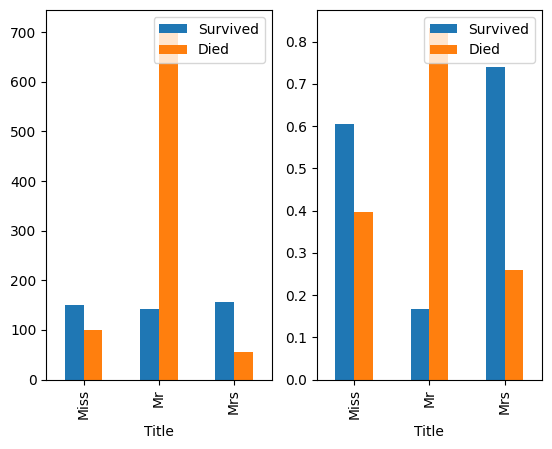

In [7]:
# 分類顯示Title欄位的生存和死亡數
fig, axes = plt.subplots(nrows=1, ncols=2)
df = titanic[["Survived","Died"]].groupby(titanic["Title"]).sum()
df.plot(kind="bar", ax=axes[0])
df = titanic[["Survived","Died"]].groupby(titanic["Title"]).mean()
df.plot(kind="bar", ax=axes[1])


<Axes: xlabel='Sex'>

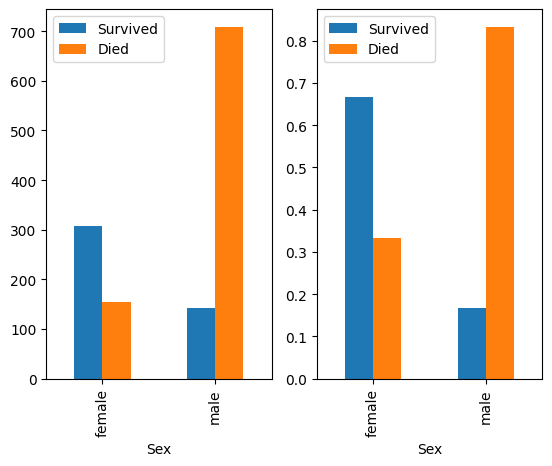

In [8]:
# 分類顯示Sex欄位的生存和死亡數
fig, axes = plt.subplots(nrows=1, ncols=2)
df = titanic[["Survived","Died"]].groupby(titanic["Sex"]).sum()
df.plot(kind="bar", ax=axes[0])
df = titanic[["Survived","Died"]].groupby(titanic["Sex"]).mean()
df.plot(kind="bar", ax=axes[1])


<Axes: xlabel='PClass'>

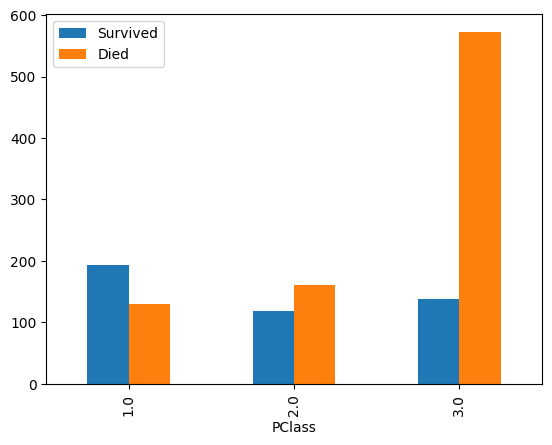

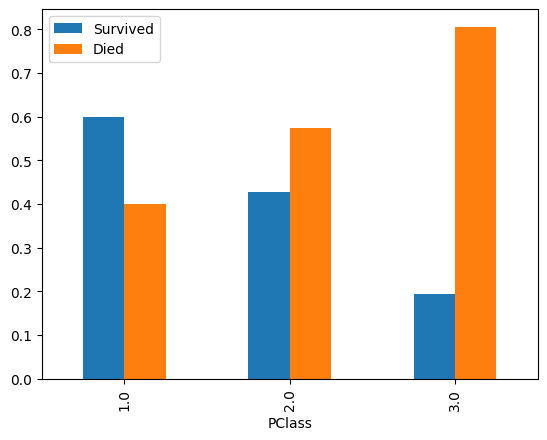

In [9]:
# 分類顯示PClass欄位的生存和死亡數
df = titanic[['Survived',"Died"]].groupby(titanic["PClass"]).sum()
df.plot(kind="bar")
df = titanic[['Survived',"Died"]].groupby(titanic["PClass"]).mean()
df.plot(kind="bar")


In [10]:
# 計算相關係數
df = titanic.drop("PassengerId", axis=1)
df

,Name,PClass,Age,Sex,Survived,SexCode,Title,Died
0,"Allen, Miss Elisabeth Walton",1.0,29.00,female,1,1,Miss,0
1,"Allison, Miss Helen Loraine",1.0,2.00,female,0,1,Miss,1
2,"Allison, Mr Hudson Joshua Creighton",1.0,30.00,male,0,0,Mr,1
3,"Allison, Mrs Hudson JC (Bessie Waldo Daniels)",1.0,25.00,female,0,1,Mrs,1
4,"Allison, Master Hudson Trevor",1.0,0.92,male,1,0,Mr,0
...,...,...,...,...,...,...,...,...
1308,"Zakarian, Mr Artun",3.0,27.00,male,0,0,Mr,1
1309,"Zakarian, Mr Maprieder",3.0,26.00,male,0,0,Mr,1
1310,"Zenni, Mr Philip",3.0,22.00,male,0,0,Mr,1
1311,"Lievens, Mr Rene",3.0,24.00,male,0,0,Mr,1


In [11]:
df1 = df.drop("Died", axis=1)
df2 = df1.drop("Title", axis=1)
df3 = df2.drop("Sex", axis=1)
df4 = df3.drop("Name", axis=1)
df4

,PClass,Age,Survived,SexCode
0,1.0,29.00,1,1
1,1.0,2.00,0,1
2,1.0,30.00,0,0
3,1.0,25.00,0,1
4,1.0,0.92,1,0
...,...,...,...,...
1308,3.0,27.00,0,0
1309,3.0,26.00,0,0
1310,3.0,22.00,0,0
1311,3.0,24.00,0,0


In [13]:
print(df4.corr())

            PClass       Age  Survived   SexCode
PClass    1.000000 -0.315551 -0.361741 -0.129711
Age      -0.315551  1.000000 -0.048236 -0.042546
Survived -0.361741 -0.048236  1.000000  0.502891
SexCode  -0.129711 -0.042546  0.502891  1.000000


In [ ]:
df.to_csv("titanic_train.csv", encoding="utf8")
df.corr().to_html("ch13-5c-02.html")
plt.show()

ValueError: could not convert string to float: 'Allen, Miss Elisabeth Walton'